# <font color='teal'> Introduction to Convolutional Neural Networks</font>

    Notebook version: 0.1. (Nov 13, 2024)

    Authors: Jerónimo Arenas García (jarenas@ing.uc3m.es)


This notebook is based on several tutorials:

   * [Convolutional Neural Networks in PyTorch](https://colab.research.google.com/github/goodboychan/chans_jupyter/blob/main/_notebooks/2020-07-29-01-Convolutional-Neural-Networks-in-PyTorch.ipynb#scrollTo=JkQg6aiNLRg7)
   * [Training a Classifier on the CIFAR dataset](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)
   * [Clasificación de imágenes en Pytorch con Google Colab y Kaggle](https://www.themachinelearners.com/clasificacion-imagenes-pytorch/)


    Changes: v.0.1. (Nov 13, 2024) - First version
             
    Pending changes:

       - Fix image linking
       - Include Data augmentation
       - Correct early stopping in the last example


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

size = 14
params = {'legend.fontsize': 'Large',
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75}
plt.rcParams.update(params)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 8)

## <font color='teal'>1. The CIFAR10 dataset </font>

Pytorch package *torchvision* has data loaders for common datasets such as ImageNet, CIFAR10, MNIST, etc. and data transformers for images, viz., torchvision.datasets and torch.utils.data.DataLoader.

This provides a huge convenience and avoids writing boilerplate code.

For this tutorial, we will use the CIFAR10 dataset. It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

Using `torchvision`, it iss extremely easy to load CIFAR10. The following fragment of code downloads train and test partitions of the CIFAR10 dataset, and applys normalization to scale every pixel in every image.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170M/170M [00:03<00:00, 48.6MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


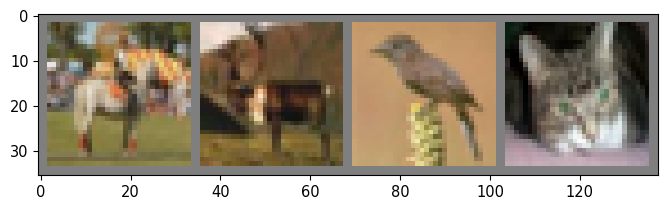

horse deer  bird  cat  


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## <font color='teal'>2. Convolutional Networks for Image Processing </font>

A Convolutional Neural Network (CNN or ConvNet) is a class of deep neural networks that is particularly effective at processing grid-like data, such as images and videos. A typical structure of a CNN is shown in the figure:

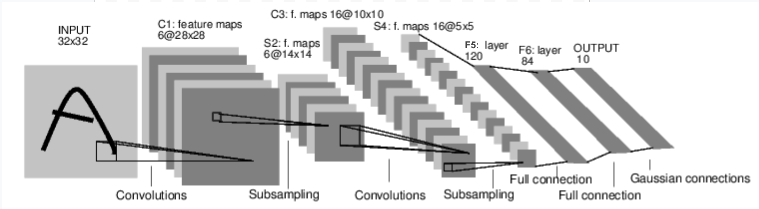

The key components and operations in a CNN are:

1. **Convolutional Layers**: These layers apply convolution operations to the input data. Convolution involves sliding a small filter (also known as a kernel) over the input to extract local patterns and features. The network learns to detect various features like edges, corners, and textures.

2. **Pooling Layers**: Pooling layers downsample the output from the convolutional layers, by combining several inputs into a single one. Common pooling operations include **max-pooling** and **average-pooling**, which reduce the spatial dimensions and retain the most important information.

3. **Fully Connected Layers**: After a series of convolutional and pooling layers, one or more fully connected layers are typically used to make final predictions. These layers are similar to those in an MLP and can learn complex, global patterns and relationships in the data.

4. **Activation Functions**: At the end of each layer, to introduce non-linearities, as in an MLP.

### <font color='teal'>2.1. Convolutional Networks for Image Processing </font>

## Convolution operator
- Problems with the Fully-connected nn
    - Do you need to consider all the relations between the features?
    - Fully connected nn are big and so very computationally inefficient
    - They have so many parameters, and so overfit
- Main idea of CNN
    - Units are connected with only a few units from the previous layer
    - Units share weights

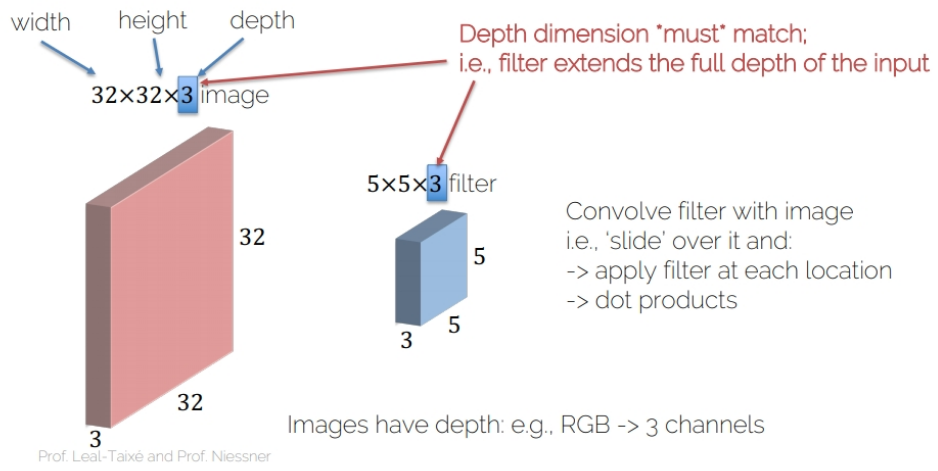

- Convolving operation

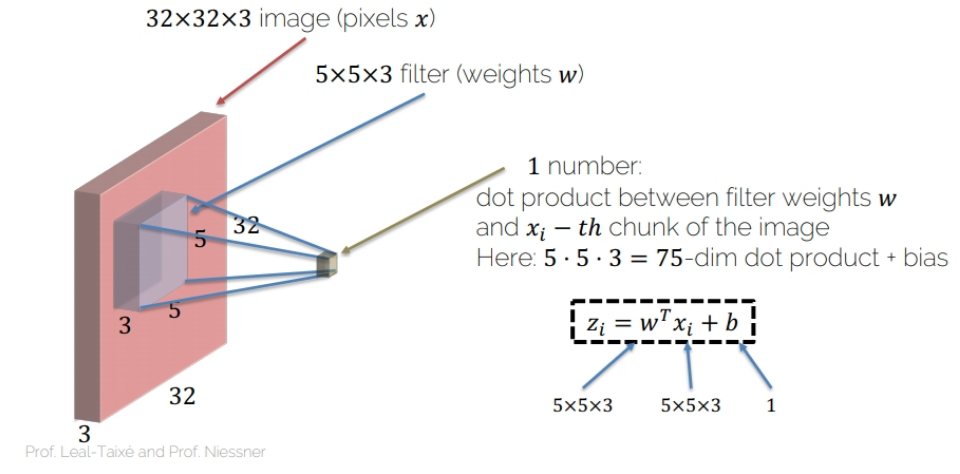!

- Activation map

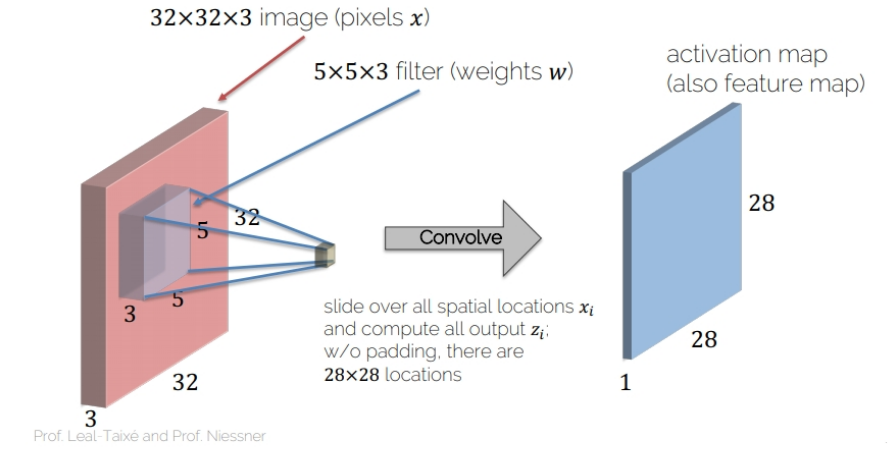

Let us apply the convolution operator over a set of images in the CIFAR10 dataset

In [ ]:
print("Size of input data:", images.shape)

# Build 6 conv. filters
conv_filters = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=(3, 3), stride=1, padding=1)

# Convolve the image with the filters
output_feature = conv_filters(images)
print("Size of convolution output:", output_feature.shape)

Size of input data: torch.Size([4, 3, 32, 32])
Size of convolution output: torch.Size([4, 6, 32, 32])


### <font color='teal'>2.2. Pooling operators </font>*

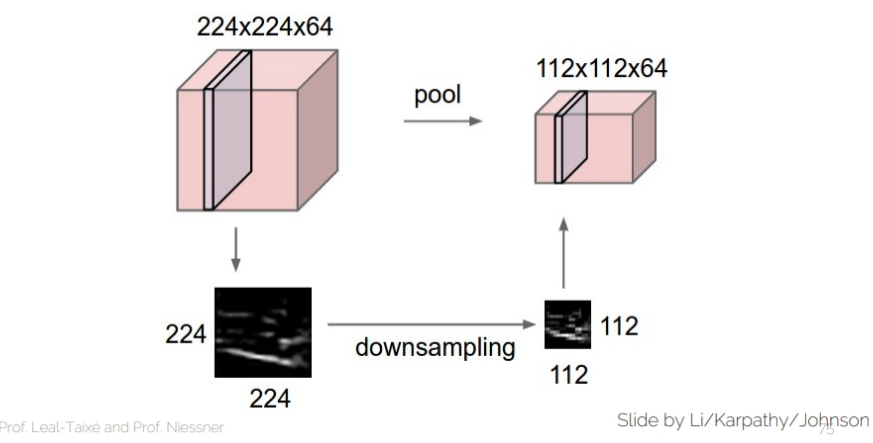

- Max Pooling

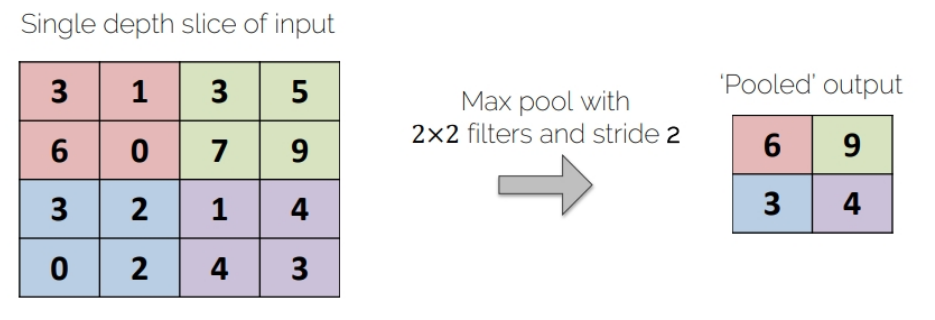

In [ ]:
# Build a pooling operator with size 2
max_pooling = nn.MaxPool2d(2)

# Apply the pooling operator
output_feature_maxpool = max_pooling(output_feature)

print("Size of convolution output:", output_feature.shape)
print("Size after pooling:", output_feature_maxpool.shape)

Size of convolution output: torch.Size([4, 6, 32, 32])
Size after pooling: torch.Size([4, 6, 16, 16])


- Average pooling

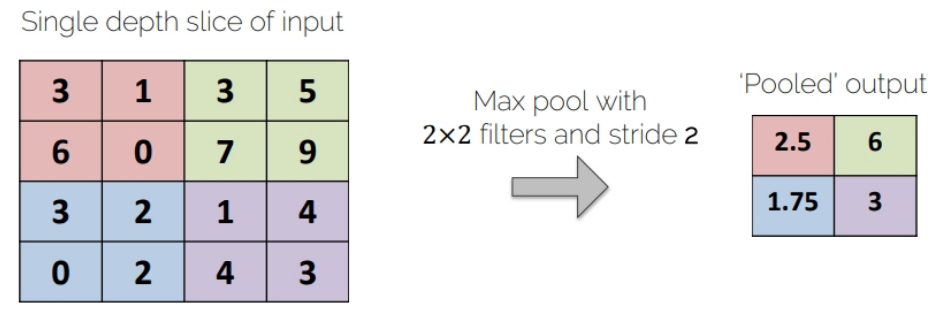

In [21]:
# Build a pooling operator with size 2
avg_pooling = nn.AvgPool2d(2)

# Apply the pooling operator
output_feature_avgpool = avg_pooling(output_feature)

print("Size of convolution output:", output_feature.shape)
print("Size after pooling:", output_feature_avgpool.shape)

Size of convolution output: torch.Size([4, 6, 32, 32])
Size after pooling: torch.Size([4, 6, 16, 16])


## <font color='teal'>3. Training a CNN classifier </font>

### <font color='teal'>3.1. Define network topology and forward evaluation method </font>

In [24]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        # Instantiate two convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=5, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1)

        # Instantiate the ReLU nonlinearity
        self.relu = nn.ReLU(inplace=True)

        # Instantiate a max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Instantiate a fully connected layer
        self.fc = nn.Linear(64 * 10, 10)

    def forward(self, x):
        # Apply conv followed by relu, then in next line pool
        x = self.relu(self.conv1(x))
        x = self.pool(x)

        # Apply conv followed by relu, then in next line pool
        x = self.relu(self.conv2(x))
        x = self.pool(x)

        # Prepare the image for the fully connected layer
        x = x.view(-1, 8 * 8 * 10)

        # Apply the fully connected layer and return the result
        return self.fc(x)

### <font color='teal'>3.2. Training CNNs</font>

In [26]:
import torch.optim as optim

net = Net()
optimizer = optim.Adam(net.parameters(), lr=3e-4)
criterion = nn.CrossEntropyLoss()

In [27]:
for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    optimizer.zero_grad()

    # Compute the forward pass
    outputs = net(inputs)

    # Compute the loss function
    loss = criterion(outputs, labels)

    # Compute the gradients
    loss.backward()

    # Update the weights
    optimizer.step()

Streaming output truncated to the last 5000 lines.
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4

### <font color='teal'>3.3. Using CNNs to make predictions</font>

In [28]:
correct = 0
total = 0

# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([

In [29]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([4, 10, 8, 8])
torch.Size([

## <font color='teal'>4. Transfer Learning </font>


We will try to create a new model using the transfer learning technique, in which we will take a pre-trained model and change the last layer to make it fit our problem. However, take into account that we need to load the data again, and resize it to fit the pretrained model.

In [30]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform = transforms.Compose([
    transforms.Resize((224, 224)),               # Resize to 224x224
    transforms.ToTensor(),                       # Convert to tensor
    transforms.Normalize(                        # Normalize to ImageNet range
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [33]:
from torchvision import models

class Classifier(nn.Module):
  def __init__(self):
    super(Classifier, self).__init__()
    self.resnet = models.resnet18(pretrained=True)
    self.resnet.fc = nn.Linear(self.resnet.fc.in_features,
                               10)
  def forward(self, image):
    output = self.resnet(image)
    return output

In [36]:
def train_model(model, train_loader, valid_loader, criterion, optimizer, device):
    total_step = len(train_loader)
    num_epochs = 10
    for epoch in range(num_epochs):
        train_loss = 0.0
        valid_loss = 0.0
        model.train()
        for i, (img, target) in enumerate(train_loader):
            img = img.to(device)
            target = target.to(device)
            optimizer.zero_grad()
            output = model(img)

            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * img.size(0)
        model.eval()
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            valid_loss += loss.item() * data.size(0)
        train_loss = train_loss / len(train_loader.sampler)
        valid_loss = valid_loss / len(valid_loader.sampler)
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch, train_loss, valid_loss))

In [ ]:
cnn = Classifier()
criterion = nn.CrossEntropyLoss()
params = cnn.resnet.fc.parameters()
optimizer = optim.Adam(params, lr=0.003)
train_model(cnn, trainloader, testloader, criterion, optimizer, "cpu")
global_accuracy(cnn, testloader)
accuracy_per_class(cnn, testloader, classes, device)